In [5]:
#author:fkw
#utf-8
#creat time:2021/11/04
#FCM
#dataset=iris
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
#load the dataset
iris = datasets.load_iris()
# 特征值
diris = iris.data
# 标签
tiris = iris.target
labels = ['setosa', 'versicolor', 'virginica']

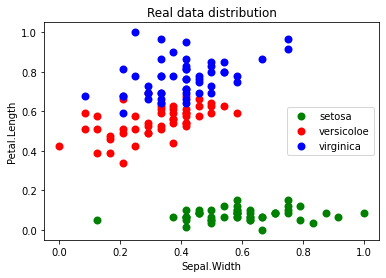

In [6]:
# 数组归一化 x=(x-min)/(max-min)
for i in range(4):
    diris[:, i] = (diris[:, i]-np.min(diris[:, i]))/(np.max(diris[:, i])-np.min(diris[:, i]))
#绘制dataset散点图,选取2,3列作为Xlable,ylabel
x_axis=diris[:,1]
y_axis=diris[:,2]
plt.scatter(x_axis[tiris==0],y_axis[tiris==0],c='green',marker='.',linewidths=5)
plt.scatter(x_axis[tiris==1],y_axis[tiris==1],c='red',marker='.',linewidths=5)
plt.scatter(x_axis[tiris==2],y_axis[tiris==2],c='blue',marker='.',linewidths=5)
plt.legend(["setosa","versicoloe","virginica"])
plt.title("Real data distribution")
plt.xlabel('Sepal.Width')
plt.ylabel('Petal.Length')
plt.show()

In [7]:
#计算欧氏距离
def caldis(center,data):
    len_center=center.shape[0]
    len_data=diris.shape[0]
    #print(len_data,len_center)
    dis=np.zeros((len_data,len_center))
    for i in range(0,len_data):
        for j in range(0,len_center):
            dis[i,j]=np.math.sqrt(sum((data[i]-center[j])**2))
    return dis
#随机生成隶属度矩阵
def randU(k,data):
    len_data=data.shape[0]
    U=np.random.random((len_data,k))
    sumU=1/np.sum(U,axis=1)
    #print((sumU.T).shape)
    U = np.multiply(U.T, sumU).T
    return U
#计算k个聚类中心
def calcen(U,data,k):
    center=np.zeros((k,data.shape[1]))
    for i in range(0,k):
        center[i]=np.dot(U[:,i].T,data)/sum(U[:,i])
    return center
#print(calcen(randU(3,diris),diris,3))
#更新隶属度,m为模糊系数
def computeU(data,center,m):
    dis=caldis(center,data)
    U=np.zeros((data.shape[0],center.shape[0]))
    for i in range(0,data.shape[0]):
        for j in range(0,center.shape[0]):
            for k in range(0,center.shape[0]):
                U[i,j]=U[i,j]+(dis[i,j]/dis[i,k])**(2/(m-1))
            U[i,j]=1/U[i,j]
    return U
#ans=computeU(diris,calcen(randU(3,diris),diris,3),2)
#返回分类的类别
def calans(U):
    return np.argmax(U,axis=1)
def train(data,k,m):
    U=randU(k,data)#初始化隶属度
    ans_old=calans(U)#初始化ans
    center_old=np.zeros((k,data.shape[1]))#初始化center_old
    item=0
    Maxitem=500#最大迭代次数
    while(1):
        center=calcen(U,data,k)#计算中心
        U=computeU(data,center,m)#更新U
        ans=calans(U)#更新ans
        item+=1
        if(((center_old-center)**2).sum()<=1):
            return ans #center几乎不再改变则停止更新
        if(item==Maxitem):
            return ans #达到最大迭代次数
        if((ans-ans_old).any()==0):
            return ans #如果ans不再改变停止更新
ans=train(diris,3,2)
print(ans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


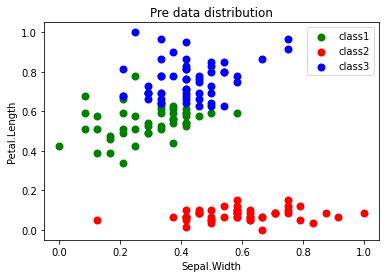

In [8]:
plt.scatter(x_axis[ans==0],y_axis[ans==0],c='green',marker='.',linewidths=5)
plt.scatter(x_axis[ans==1],y_axis[ans==1],c='red',marker='.',linewidths=5)
plt.scatter(x_axis[ans==2],y_axis[ans==2],c='blue',marker='.',linewidths=5)
plt.legend(["class1","class2","class3"])
plt.title("Pre data distribution")
plt.xlabel('Sepal.Width')
plt.ylabel('Petal.Length')
plt.show()